<a href="https://colab.research.google.com/github/shitchell/mu-mee6/blob/main/MU_Leaderboard_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

  # coding & programming xp stats

</center>

###### **setup** -- *ignore*

well aren't you a little rebel ಠ_ಠ

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import numpy as np

pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.7.12.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.104+
Version          : #1 SMP Sat Jun 5 09:50:34 PDT 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.4
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.24
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

In [57]:
# some settings
#%load_ext google.colab.data_table
%unload_ext google.colab.data_table

# mpl.rcParams['figure.figsize'] = (12, 6)
# mpl.rcParams['figure.dpi'] = 100
# mpl.rcParams['savefig.dpi'] = 100
# mpl.rcParams['lines.linewidth'] = 2

plt.style.use(['dark_background', 'seaborn-colorblind'])
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "figure.facecolor": "#383838",
    "axes.facecolor": "#333",
    "savefig.facecolor": "#333",
    "text.color": "#FFF",
    "axes.grid": True,
    "axes.grid.which": "both",
    "axes.axisbelow": True,
    "grid.color": "#383838",
    "figure.dpi": 100,
    "savefig.dpi": 100,
    "lines.linewidth": 2
})
# plt.style.use(['dark_background'])

# i'm not using this for this one, but keeping it just in case i decide to
from types import SimpleNamespace
options = SimpleNamespace(
  # plot sizes
  figsize = (12, 6),
  color_primary = 'blue',
  color_secondary = 'red',
  alpha = 0.5,
  cell_padding = "0.5em"
)

# xkcd style charts
#plt.xkcd()

The google.colab.data_table extension is not loaded.


get some datums

In [58]:
# import the datums
df = pd.read_csv("https://raw.githubusercontent.com/shitchell/mu-mee6/main/db.csv")

# setup the timestamp
#  1. convert from seconds since epoch
#  2. set to EST timezone
#  3. set the seconds value to "00"
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s").dt.tz_localize('UTC').dt.tz_convert('America/New_York').dt.floor("T")

calculate the xp difference between update intervals

In [59]:
xp_df = df.pivot(index="timestamp", columns="user", values="xp").copy()
# create a blank row of zeroes
zeroes = pd.DataFrame([[0] * len(xp_df.columns)], columns=xp_df.columns)
# duplicate xp_df, put the row of zeroes at the top, and remove the last row,
# creating a duplicate of xp_df that's shifted down. then subtract the duplicate
# from xp_df and remove the first row
xp_interval = (xp_df - zeroes.append(xp_df.iloc[:-1]).set_index(xp_df.index)).iloc[1:].astype(pd.Int32Dtype())

some functions

In [60]:
def get_top_history(count):
  """
  Get the historical data for the latest top `count` users 
  """
  top = latest.iloc[:count]["user"]
  return df[df["user"].isin(top)]

def get_username_history(username):
  return df[df["username"] == username]

def plot_historical(df, since="2021-10-23"):
  df.pivot(index="timestamp", columns="user", values="xp").loc[since:].plot().legend(
      loc="lower center",
      bbox_to_anchor=(0.5, 1),
      ncol=5,
      frameon=False)
  plt.show()

def level_points(level: int) -> int:
    """                                   
    Returns the number of points required to reach the given level
    """                                   
    # determined with https://www.dcode.fr/function-equation-finder
    return int(((5*level**3)/3 + (45*level**2)/2 + 455*level/6))

some vars

In [61]:
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
last_timestamp = df.iloc[-1].timestamp

filter out and do some stuff with the most recent update

In [62]:
# get the most recent leaderboard snapshot
latest = df[df["timestamp"] == df.iloc[-1].timestamp].copy().reset_index()

# find the average xp per message
latest["avg_xp"] = (latest["xp"] / latest["messages"]).round(2)

# add a column to show how many points to the next level
latest["xp_up"] = (latest["level"] + 1).apply(level_points) - latest["xp"]

# find the approximate number of messages required to reach the next level
latest["msg_up"] = (latest["xp_up"] / latest["avg_xp"]).astype(int)

## top 10

In [63]:
#@title {form-width: "200px"}
display(latest.iloc[:10][["username", "messages", "level", "xp", "xp_up", "msg_up"]])
print("updated", latest.iloc[0].timestamp)

,username,messages,level,xp,xp_up,msg_up
0,guy,3792,31,75506,4574,229
1,mattupham,3229,29,64410,3115,156
2,CrackedPotato,3220,29,64264,3261,163
3,.King,2462,26,49391,1864,92
4,Arsenic,2439,26,48657,2598,130
5,x13xDread,1855,23,37194,626,31
6,kakashi28,1239,20,24773,2177,108
7,Joe mama,1226,20,24259,2691,135
8,Martijn,1200,20,24069,2881,143
9,Wolfe,1142,19,22512,1338,67


updated 2021-10-26 13:00:00-04:00


`xp_up` &nbsp;&nbsp;xp required to reach next level  
`msg_up` approximate messages to reach next level

**note**: *to avoid encouraging spamming, xp is only awarded once per minute for every minute you send 1+ messages. so `msg_up` is moreso representative of the number of minutes you must spend sending messages.*

## top 5 gainers

### over the last 5 hours

In [64]:
#@title {form-width: "200px"}
# find the total gains of every user over the last 5 hours
top_movers = xp_interval[last_timestamp - pd.Timedelta("5 hours"):]
top_movers = top_movers.sum(axis=0).nlargest(5).index
# select all of the data points for those 5 users from the last 5 hours
top_movers_data = xp_interval[xp_interval.columns.intersection(top_movers)][-5:]
# sort the top 5 by total xp gain and remove the #0001 discord discriminator
tmd = top_movers_data.reindex(top_movers_data.sum().sort_values(ascending=False).index, axis=1).rename(lambda x: x[:-5], axis=1)
tmd = tmd.append(tmd.sum().rename("total"))
tmd = tmd.loc[:, (tmd != 0).any(axis=0)]
display(tmd)
if len(tmd.columns) < 5:
  print("")
  print("* xp stats are only available for top-100 users,")
  print("  but there have been fewer than 5 top-100 users active in the last 5 hours.")

user,TimberWoolf,CrackedPotato,G.T,x7b8,Martijn
timestamp,,,,,
2021-10-26 09:00:00-04:00,0,24,23,0,22
2021-10-26 10:00:00-04:00,24,0,143,47,15
2021-10-26 11:00:00-04:00,331,300,42,125,22
2021-10-26 12:00:00-04:00,274,197,150,113,16
2021-10-26 13:00:00-04:00,386,196,210,34,0
total,1015,717,568,319,75


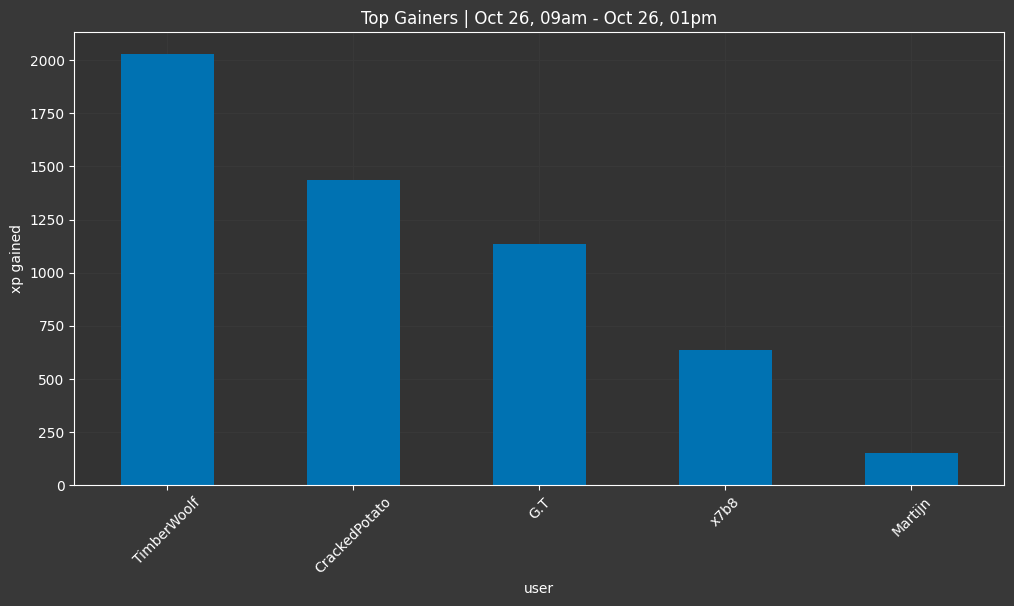

In [65]:
#@title {form-width: "200px"}
start = tmd.iloc[0].name.strftime("%b %d, %I%P")
end = tmd.iloc[-2].name.strftime("%b %d, %I%P")
tmd.sum().plot.bar(
    title=f"Top Gainers | {start} - {end}",
    ylabel="xp gained",
    rot=45
)

### over the last week

In [66]:
#@title {form-width: "200px"}
# find the total gains of every user over the last week
xp_interval_week = xp_interval[last_timestamp - pd.Timedelta("7 days"):]
top_movers = xp_interval_week.sum(axis=0).nlargest(5).index
# select all of the data points for those 5 users from the last week
top_movers_data = xp_interval[xp_interval_week.columns.intersection(top_movers)]
top_movers_data.index = top_movers_data.index.strftime("%b %d")
tmd = top_movers_data.groupby(top_movers_data.index).sum().rename(lambda x: x[:-5], axis=1)
# reorder by largest total
tmd_totals = tmd.sum().rename("total")
tmd = tmd.reindex(tmd_totals.sort_values(ascending=False).index, axis=1)
tmd.append(tmd_totals).rename_axis("day")

user,MrCookiefries,TimberWoolf,guy,G.T,tomato
day,,,,,
Oct 23,0,0,558,232,0
Oct 24,631,0,1005,1192,302
Oct 25,2982,3005,1283,914,1838
Oct 26,1241,1056,1017,1446,1065
total,4854,4061,3863,3784,3205


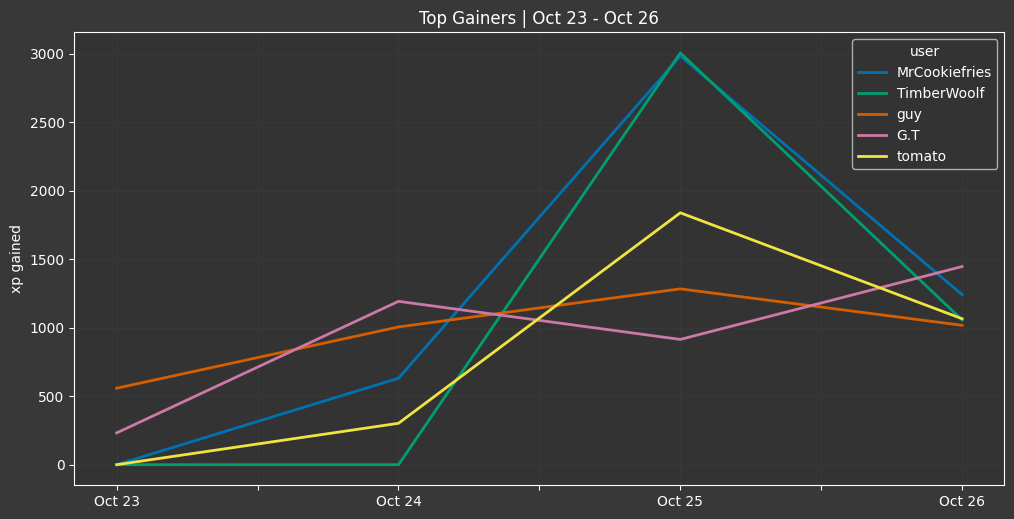

In [67]:
#@title {form-width: "200px"}
start = top_movers_data.iloc[0].name
end = top_movers_data.iloc[-1].name
tmd.index = tmd.index.astype(str)
tmd.plot(
    title=f"Top Gainers | {start} - {end}",
    ylabel="xp gained",
    xlabel=""
)

## *note*

*to manipulate the following forms, you must first run all cells to reload the data*  
*`Runtime > Run All`*

## historical xp

show the historical data for the top `count` users

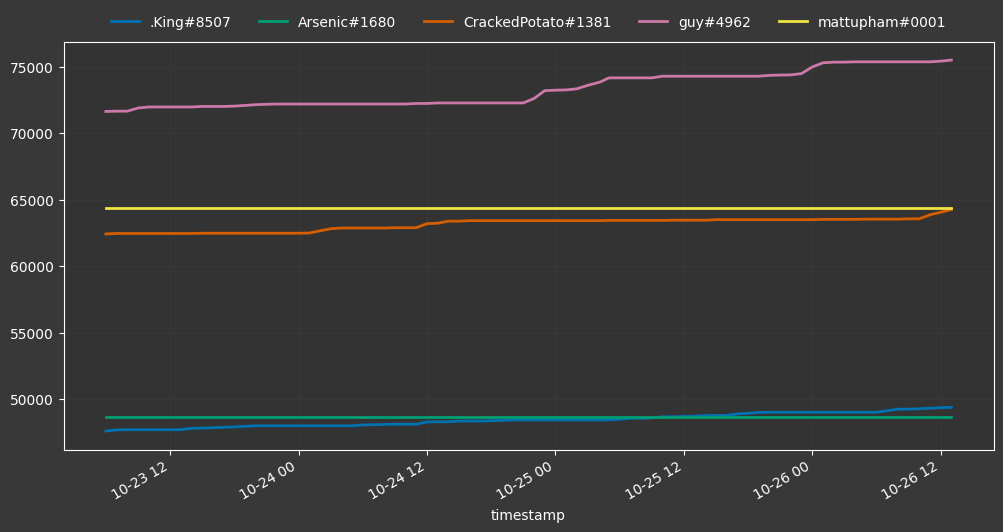

In [68]:
count =   5#@param {type: "number"}
since = "2021-10-23" #@param {type: "date"}

plot_historical(get_top_history(count), since)

## user xp history

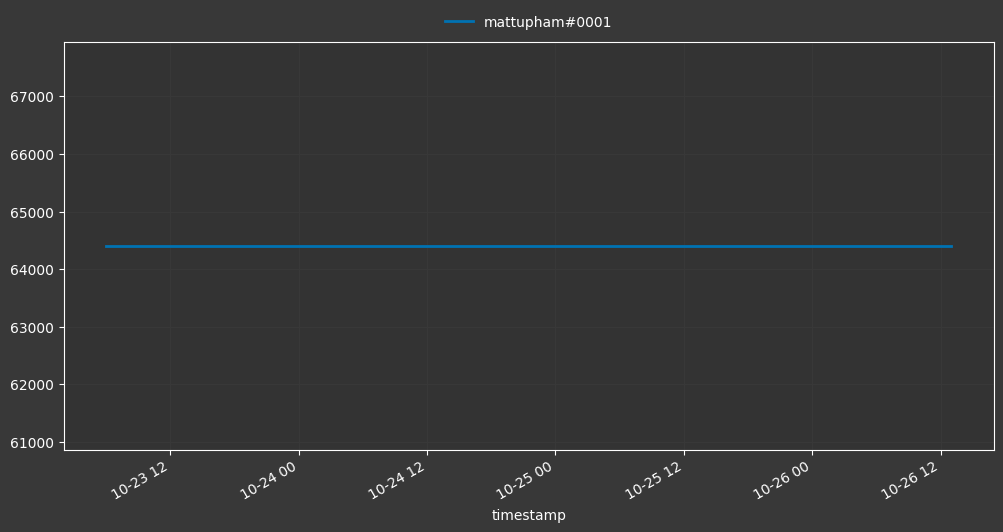

In [69]:
username = "mattupham" #@param {type: "string"}
since = "2021-10-23" #@param {type: "date"}

plot_historical(get_username_history(username), since)

## xp gains by interval

this shows how much xp is gained *overall* per unit of time. i.e. how many messages are sent and how active the server is by day/hour/etc.

since i started collecting data on october 23, 2021, there's not much data at the time of writing for the *day*, *month*, and *year* categories. just hold tight and wait for those sweet datums to roll in :D

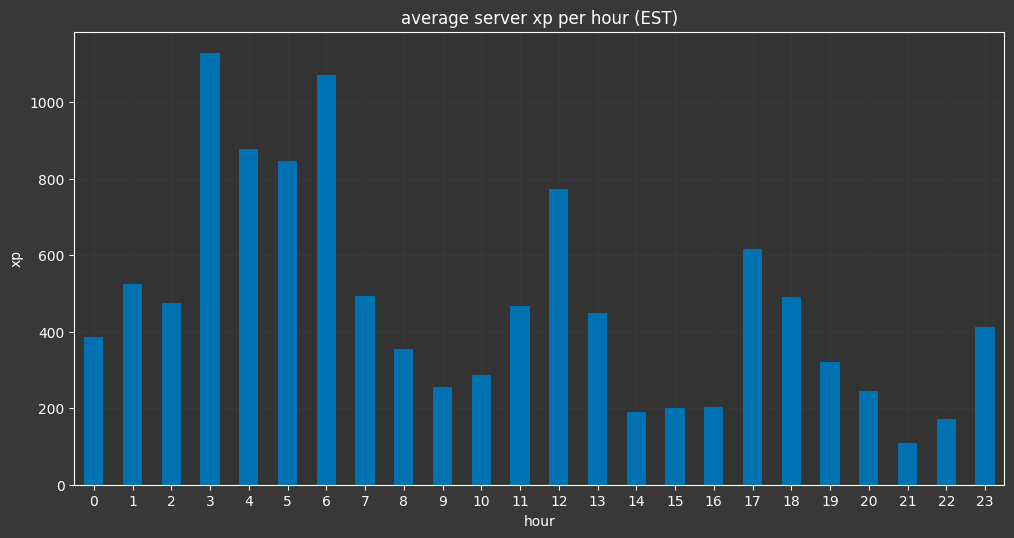

In [70]:
#@title {form-width: "200px"}
xp_interval.sum(axis=1).groupby(xp_interval.index.hour).mean().plot.bar(
    xlabel="hour",
    ylabel="xp",
    title="average server xp per hour (EST)",
    rot=0)

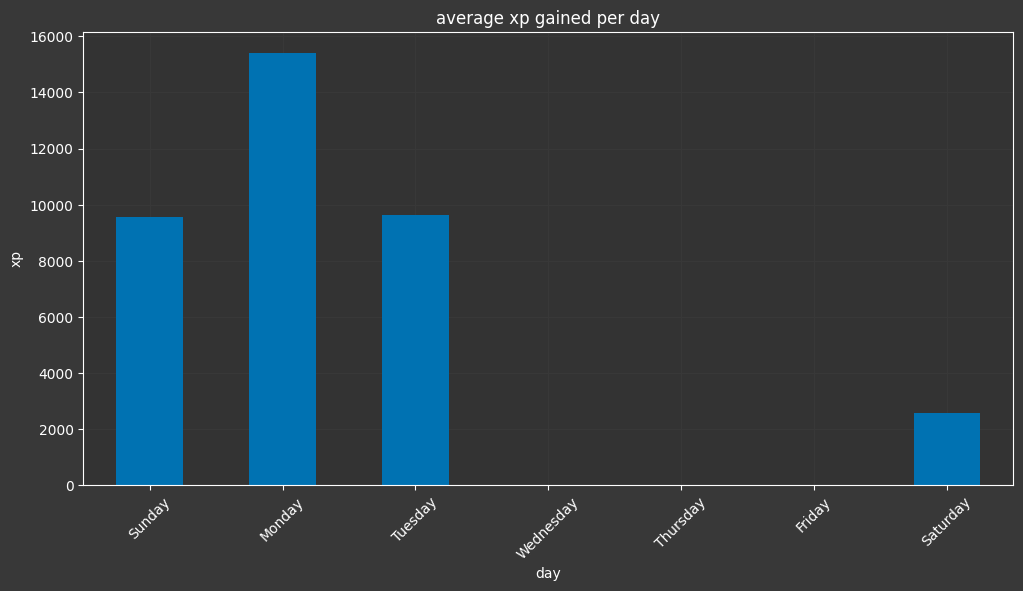

In [71]:
#@title {form-width: "200px"}
xp_daily = xp_interval.resample("1d").sum()
xp_daily.sum(axis=1).groupby(xp_daily.index.day_name()).sum().reindex(weekdays).plot.bar(
    xlabel="day",
    ylabel="xp",
    title="average xp gained per day",
    rot=45)

In [72]:
#@title xp gained by hour and day {form-width: "200px"}
xp_interval_sum = xp_interval.sum(axis=1).to_frame().set_axis(["xp"], axis=1)
xp_interval_sum.pivot_table(
  index=xp_interval_sum.index.hour,
  columns=xp_interval_sum.index.day_name(),
  fill_value=xp_interval_sum.xp,
  aggfunc="mean"
).droplevel(level=0, axis=1).rename_axis("", axis=1)\
.rename_axis("").reindex(weekdays, axis=1).T.astype(pd.Int32Dtype()).fillna(0)\
.style\
  .background_gradient(cmap='Blues_r', axis=None)\
  .set_properties(padding="8px")\
  .set_table_styles([
      {"selector": "th", "props": "background: #383838 !important"},
      {"selector": "table", "props": "height: 3em;"}
  ])\
  .set_sticky()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
,,,,,,,,,,,,,,,,,,,,,,,,
Sunday,68,273,357,810,446,237,245,169,94,153,119,287,2055,296,339,447,146,357,875,526,258,0,371,631
Monday,38,187,787,2018,2028,2007,1906,909,331,134,375,525,201,374,123,82,354,1385,513,221,364,255,94,180
Tuesday,1055,1116,278,557,159,293,1064,679,964,173,384,953,833,1105,0,0,0,0,0,0,0,0,0,0
Wednesday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Thursday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Friday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Saturday,0,0,0,0,0,0,0,218,32,562,275,106,0,20,106,75,111,105,86,215,114,75,52,427


## posting frequency and consistency

*under construction*

we'll determine how consistently people message by calculating the *standard deviation* of their xp gains and how often they have periods of gaining 0 xp. a higher standard deviation in their xp gain, the more inconsistency their is with how many messages they send when they *do* send messages.

**e.g.**: if *joe* gains 200xp when he gets on at 2pm and then 100xp when he gets back on at 8pm, but *jack* gains 200xp at 2pm and 190xp at 8pm, then *joe* will have a higher standard deviation than *jack* and thus more inconsistency with how many messages he sends when he gets on.

In [73]:
#@title xp gain standard deviation {form-width: "200px"}
dev = xp_interval.std()
dev = dev[dev != 0].to_frame().set_axis(["deviation"], axis=1)
dev["deviation"] = dev["deviation"].round(1)
dev["xp"] = latest[["user", "xp"]].set_index("user")
dev.index = dev.index.str.slice(0, -5)
dev.dropna(inplace=True)
dev[["deviation"]].sort_values(ascending=False, by="deviation").iloc[:50].T

user,MrCookiefries,TimberWoolf,tomato,guy,G.T,Joe mama,Briann,Martijn,CrackedPotato,grap3s,.King,Deafenstein,Kayden,Toivi,x13xDread,x7b8,Pinch ¤,UD,Why you reading this?,Wolfturn,Manavjeet,BeeVa,louie123,parrotassassin,kakashi28,SavageSlayer,~%[+],yuyutsu,ψ𝕸𝖚𝖙𝖊𝖉ψ,Koala,Blimp,preston *,Helix,TS_,xcoemp,CallMeAxel,AMIN_IS_TALL,Logix Indie,Sirius,PenetratingPineapple,bIue,HarryTosterSiciliano,Pump103,Critical
deviation,150.7,145.0,127.3,111.6,99.0,79.3,77.9,65.4,62.8,39.9,34.4,34.3,29.8,25.5,22.4,20.6,18.2,16.3,15.6,14.2,12.3,11.0,9.9,9.5,8.8,7.4,7.3,5.9,3.7,3.4,3.2,3.2,3.2,2.8,2.6,2.4,2.4,2.0,1.9,1.8,1.8,1.4,0.5,0.3


In [74]:
(xp_interval == 0)

user,*Paul*#7618,-.-#3997,.King#8507,AMIN_IS_TALL#0153,Alexa Matei#0001,Anonymous_Person#9601,Arsenic#1680,Asaor#0558,BeeVa#0001,Blimp#9634,Bobcat12#2318,Bolty#3277,Briann#6841,Buddha#7618,CallMeAxel#4919,Cameren#0850,CrackedPotato#1381,Critical#1337,Crusty#6873,CrustyBathTub#8836,Deafenstein#2166,Echocage#0001,Electric Owl#9344,Evander#4547,G.T#2466,Greeed#2050,Harley#6177,HarryTosterSiciliano#3228,Helix#1504,ImDA1#4812,Joe mama#8155,JustAVixen#4077,Kayden#4937,Koala#9678,Logix Indie#8622,Luki#9729,Man Milk#9973,Manavjeet#7631,"Mark ""Elsewhere"" Lynch#5229",Martijn#1069,...,Underdog08#7317,Unity [Breakthrough Form]#9127,Why you reading this?#0666,Wolfe#0707,Wolfturn#5999,Zack#2743,alu here#7222,bIue#4170,bebo#2611,chase#1771,cradaper#5097,datguy#1244,fat boy#7919,grap3s#7184,guy#4962,halfhiden/Bigeasy7296814#4406,hyp3r#9168,jk0062#1921,kakashi28#7142,kitkatsnickers#4644,louie123#5220,mattupham#0001,medicinalcake#1234,parrotassassin#1458,preston *#9921,sw#6082,tomato#4206,will#4826,winnie l’ourson#6117,wpocrqijigheyfruwqry#8955,x13xDread#9232,x7b8#4744,xcoemp#1647,xcoemp#8539,yuyutsu#1734,~%[+]#5425,ψ𝕸𝖚𝖙𝖊𝖉ψ#1733,⪓𝕽𝖆͢͢͢𝖝⪔#8826,ゆみ/yumi#1216,𝙣 𝙞 𝙘 𝙠#2268
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-23 07:00:00-04:00,True,True,False,True,True,True,True,True,True,True,True,False,True,<NA>,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,<NA>,True,True,True,True,True,True,True,True,False,True,True,True,True
2021-10-23 08:00:00-04:00,True,True,False,True,True,True,True,True,True,True,True,True,True,<NA>,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,<NA>,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-10-23 09:00:00-04:00,True,True,True,True,True,True,True,True,True,True,True,False,True,<NA>,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,<NA>,True,True,True,True,True,True,True,True,True,True,True,True,True
2021-10-23 10:00:00-04:00,True,True,True,True,True,True,True,True,True,True,True,False,True,<NA>,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,<NA>,True,True,True,True,False,True,True,True,False,True,True,True,True
2021-10-23 11:00:00-04:00,True,True,True,True,True,True,True,True,True,True,True,False,True,<NA>,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,<NA>,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26 09:00:00-04:00,True,True,True,True,True,True,True,True,True,True,True,<NA>,True,<NA>,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,...,True,Tru

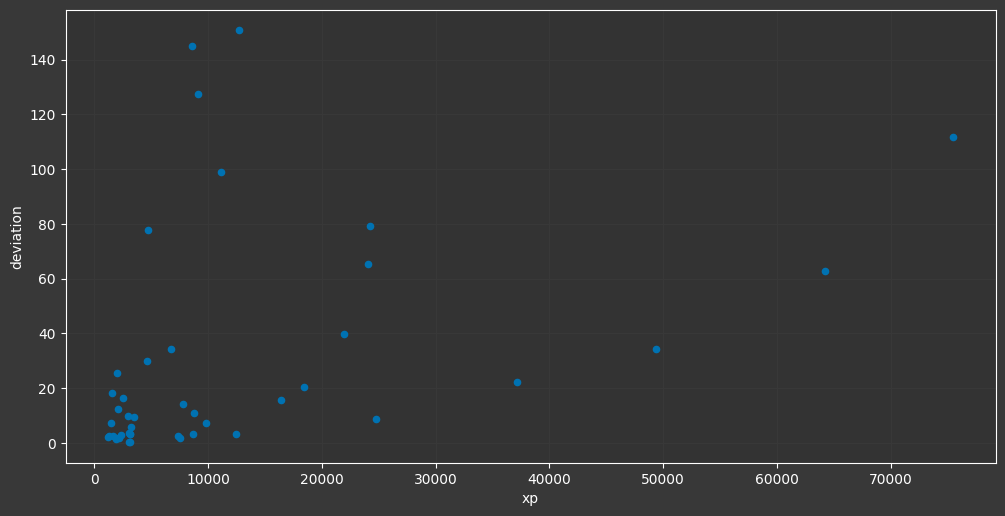

In [75]:
dev.plot.scatter(x="xp", y="deviation")

###### **test code** -- *ignore*

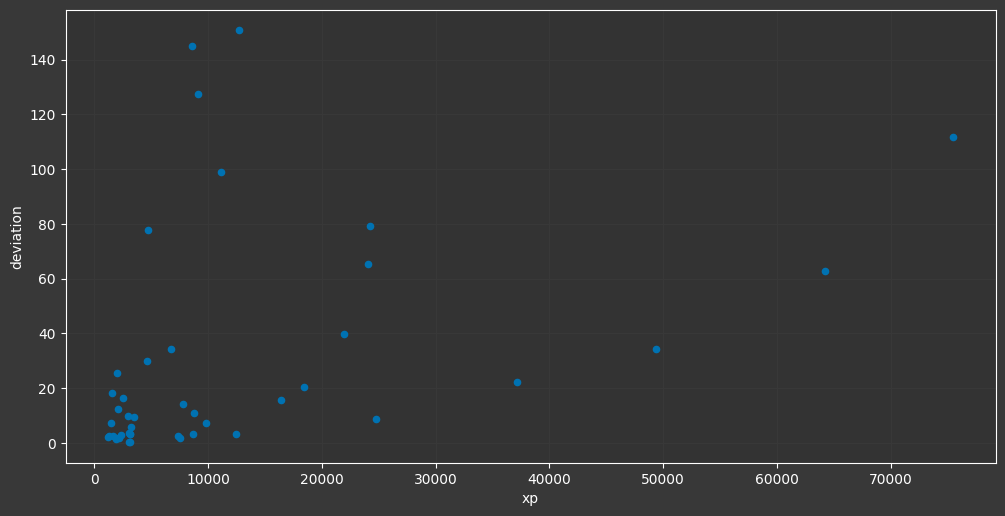

In [76]:
dev = xp_interval.std()
dev = dev[dev != 0].to_frame().set_axis(["deviation"], axis=1)
dev["deviation"] = dev["deviation"].round(1)
dev["xp"] = latest[["user", "xp"]].set_index("user")
dev.index = dev.index.str.slice(0, -5)
dev.dropna(inplace=True)
dev.plot.scatter(x="xp", y="deviation")

In [77]:
xp_interval.iloc[:5].rename(lambda x: x.strftime("%H:%M%P"))

user,*Paul*#7618,-.-#3997,.King#8507,AMIN_IS_TALL#0153,Alexa Matei#0001,Anonymous_Person#9601,Arsenic#1680,Asaor#0558,BeeVa#0001,Blimp#9634,Bobcat12#2318,Bolty#3277,Briann#6841,Buddha#7618,CallMeAxel#4919,Cameren#0850,CrackedPotato#1381,Critical#1337,Crusty#6873,CrustyBathTub#8836,Deafenstein#2166,Echocage#0001,Electric Owl#9344,Evander#4547,G.T#2466,Greeed#2050,Harley#6177,HarryTosterSiciliano#3228,Helix#1504,ImDA1#4812,Joe mama#8155,JustAVixen#4077,Kayden#4937,Koala#9678,Logix Indie#8622,Luki#9729,Man Milk#9973,Manavjeet#7631,"Mark ""Elsewhere"" Lynch#5229",Martijn#1069,...,Underdog08#7317,Unity [Breakthrough Form]#9127,Why you reading this?#0666,Wolfe#0707,Wolfturn#5999,Zack#2743,alu here#7222,bIue#4170,bebo#2611,chase#1771,cradaper#5097,datguy#1244,fat boy#7919,grap3s#7184,guy#4962,halfhiden/Bigeasy7296814#4406,hyp3r#9168,jk0062#1921,kakashi28#7142,kitkatsnickers#4644,louie123#5220,mattupham#0001,medicinalcake#1234,parrotassassin#1458,preston *#9921,sw#6082,tomato#4206,will#4826,winnie l’ourson#6117,wpocrqijigheyfruwqry#8955,x13xDread#9232,x7b8#4744,xcoemp#1647,xcoemp#8539,yuyutsu#1734,~%[+]#5425,ψ𝕸𝖚𝖙𝖊𝖉ψ#1733,⪓𝕽𝖆͢͢͢𝖝⪔#8826,ゆみ/yumi#1216,𝙣 𝙞 𝙘 𝙠#2268
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
07:00am,0,0,80,0,0,0,0,0,0,0,0,23,0,<NA>,0,0,37,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,23,0,0,0,0
08:00am,0,0,16,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0
09:00am,0,0,0,0,0,0,0,0,0,0,0,246,0,<NA>,0,0,0,0,0,0,0,0,0,0,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,236,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0
10:00am,0,0,0,0,0,0,0,0,0,0,0,73,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,42,0,0,0,58,0,0,0,0
11:00am,0,0,0,0,0,0,0,0,0,0,0,41,0,<NA>,0,0,0,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
latest.sort_values(["timestamp", "xp"], ascending=False)

,index,level,messages,username,xp,user,timestamp,avg_xp,xp_up,msg_up
0,7900,31,3792,guy,75506,guy#4962,2021-10-26 13:00:00-04:00,19.91,4574,229
1,7901,29,3229,mattupham,64410,mattupham#0001,2021-10-26 13:00:00-04:00,19.95,3115,156
2,7902,29,3220,CrackedPotato,64264,CrackedPotato#1381,2021-10-26 13:00:00-04:00,19.96,3261,163
3,7903,26,2462,.King,49391,.King#8507,2021-10-26 13:00:00-04:00,20.06,1864,92
4,7904,26,2439,Arsenic,48657,Arsenic#1680,2021-10-26 13:00:00-04:00,19.95,2598,130
...,...,...,...,...,...,...,...,...,...,...
95,7995,5,62,Raven Coder,1252,Raven Coder#8495,2021-10-26 13:00:00-04:00,20.19,373,18
96,7996,5,61,halfhiden/Bigeasy7296814,1223,halfhiden/Bigeasy7296814#4406,2021-10-26 13:00:00-04:00,20.05,402,20
97,7997,5,62,⪓𝕽𝖆͢͢͢𝖝⪔,1222,⪓𝕽𝖆͢͢͢𝖝⪔#8826,2021-10-26 13:00:00-04:00,19.71,403,20
98,7998,5,62,Logix Indie,1216,Logix Indie#8622,2021-10-26 13:00:00-04:00,19.61,409,20


In [79]:
ts2 = pd.Timestamp("2021-10-25 02:00:00-04:00")
ts3 = pd.Timestamp("2021-10-25 03:00:00-04:00")
ts4 = pd.Timestamp("2021-10-25 04:12:00-04:00")

In [80]:
missing = df[df.timestamp == ts4].copy()
missing.timestamp = ts3